# First pass

> Fill in a module description here

In [ ]:
#| hide
from IPython.display import YouTubeVideo

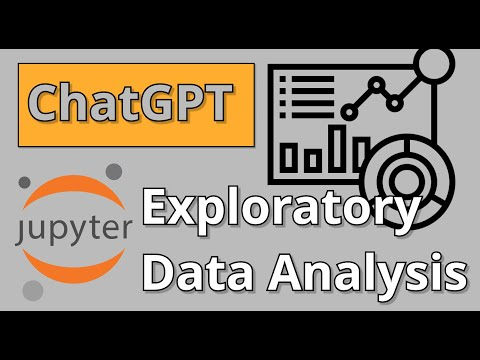

In [ ]:
YouTubeVideo("jHXTzL5tyG4", width=1920 / 4, height=1080/4)

## Imports

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm

register_matplotlib_converters()
import seaborn as sns
from IPython.display import Markdown, display

sns.set()
sns.set_context("poster", font_scale=1.3)
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

from ydata_profiling import ProfileReport

## Functions

In [ ]:
def raw_to_clean(raw):
    return (
        raw.assign(Major=lambda x: x.Major.str.title())
    )

def plot_top_n_salaries(df, top_n):
    df_sorted = df.nlargest(top_n, 'Median')
    df_plot = df_sorted[['Major', 'P25th', 'Median', 'P75th']]
    df_melted = df_plot.melt(id_vars='Major', value_vars=['P25th', 'Median', 'P75th'])

    fig, ax = plt.subplots(figsize=(20, 8))
    fig.patch.set_facecolor('w')

    sns.barplot(x='value', y='Major', hue='variable', data=df_melted, ax=ax)
    ax.set_title('P25, Median, and P75 Salaries for Top {} Majors'.format(top_n))
    ax.set_xlabel('Salary')
    ax.set_ylabel('Major')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    fig.tight_layout()

## Data

In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")

### Cleaning

In [ ]:
df = raw_to_clean(raw)

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,Petroleum Engineering,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,1849,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,Mining And Mineral Engineering,756.0,679.0,77.0,Engineering,0.1019,7,640,556,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,Metallurgical Engineering,856.0,725.0,131.0,Engineering,0.1530,3,648,558,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,Naval Architecture And Marine Engineering,1258.0,1123.0,135.0,Engineering,0.1073,16,758,1069,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,23170,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972


## Data Visualization Plots


### Popularity of each Major Category

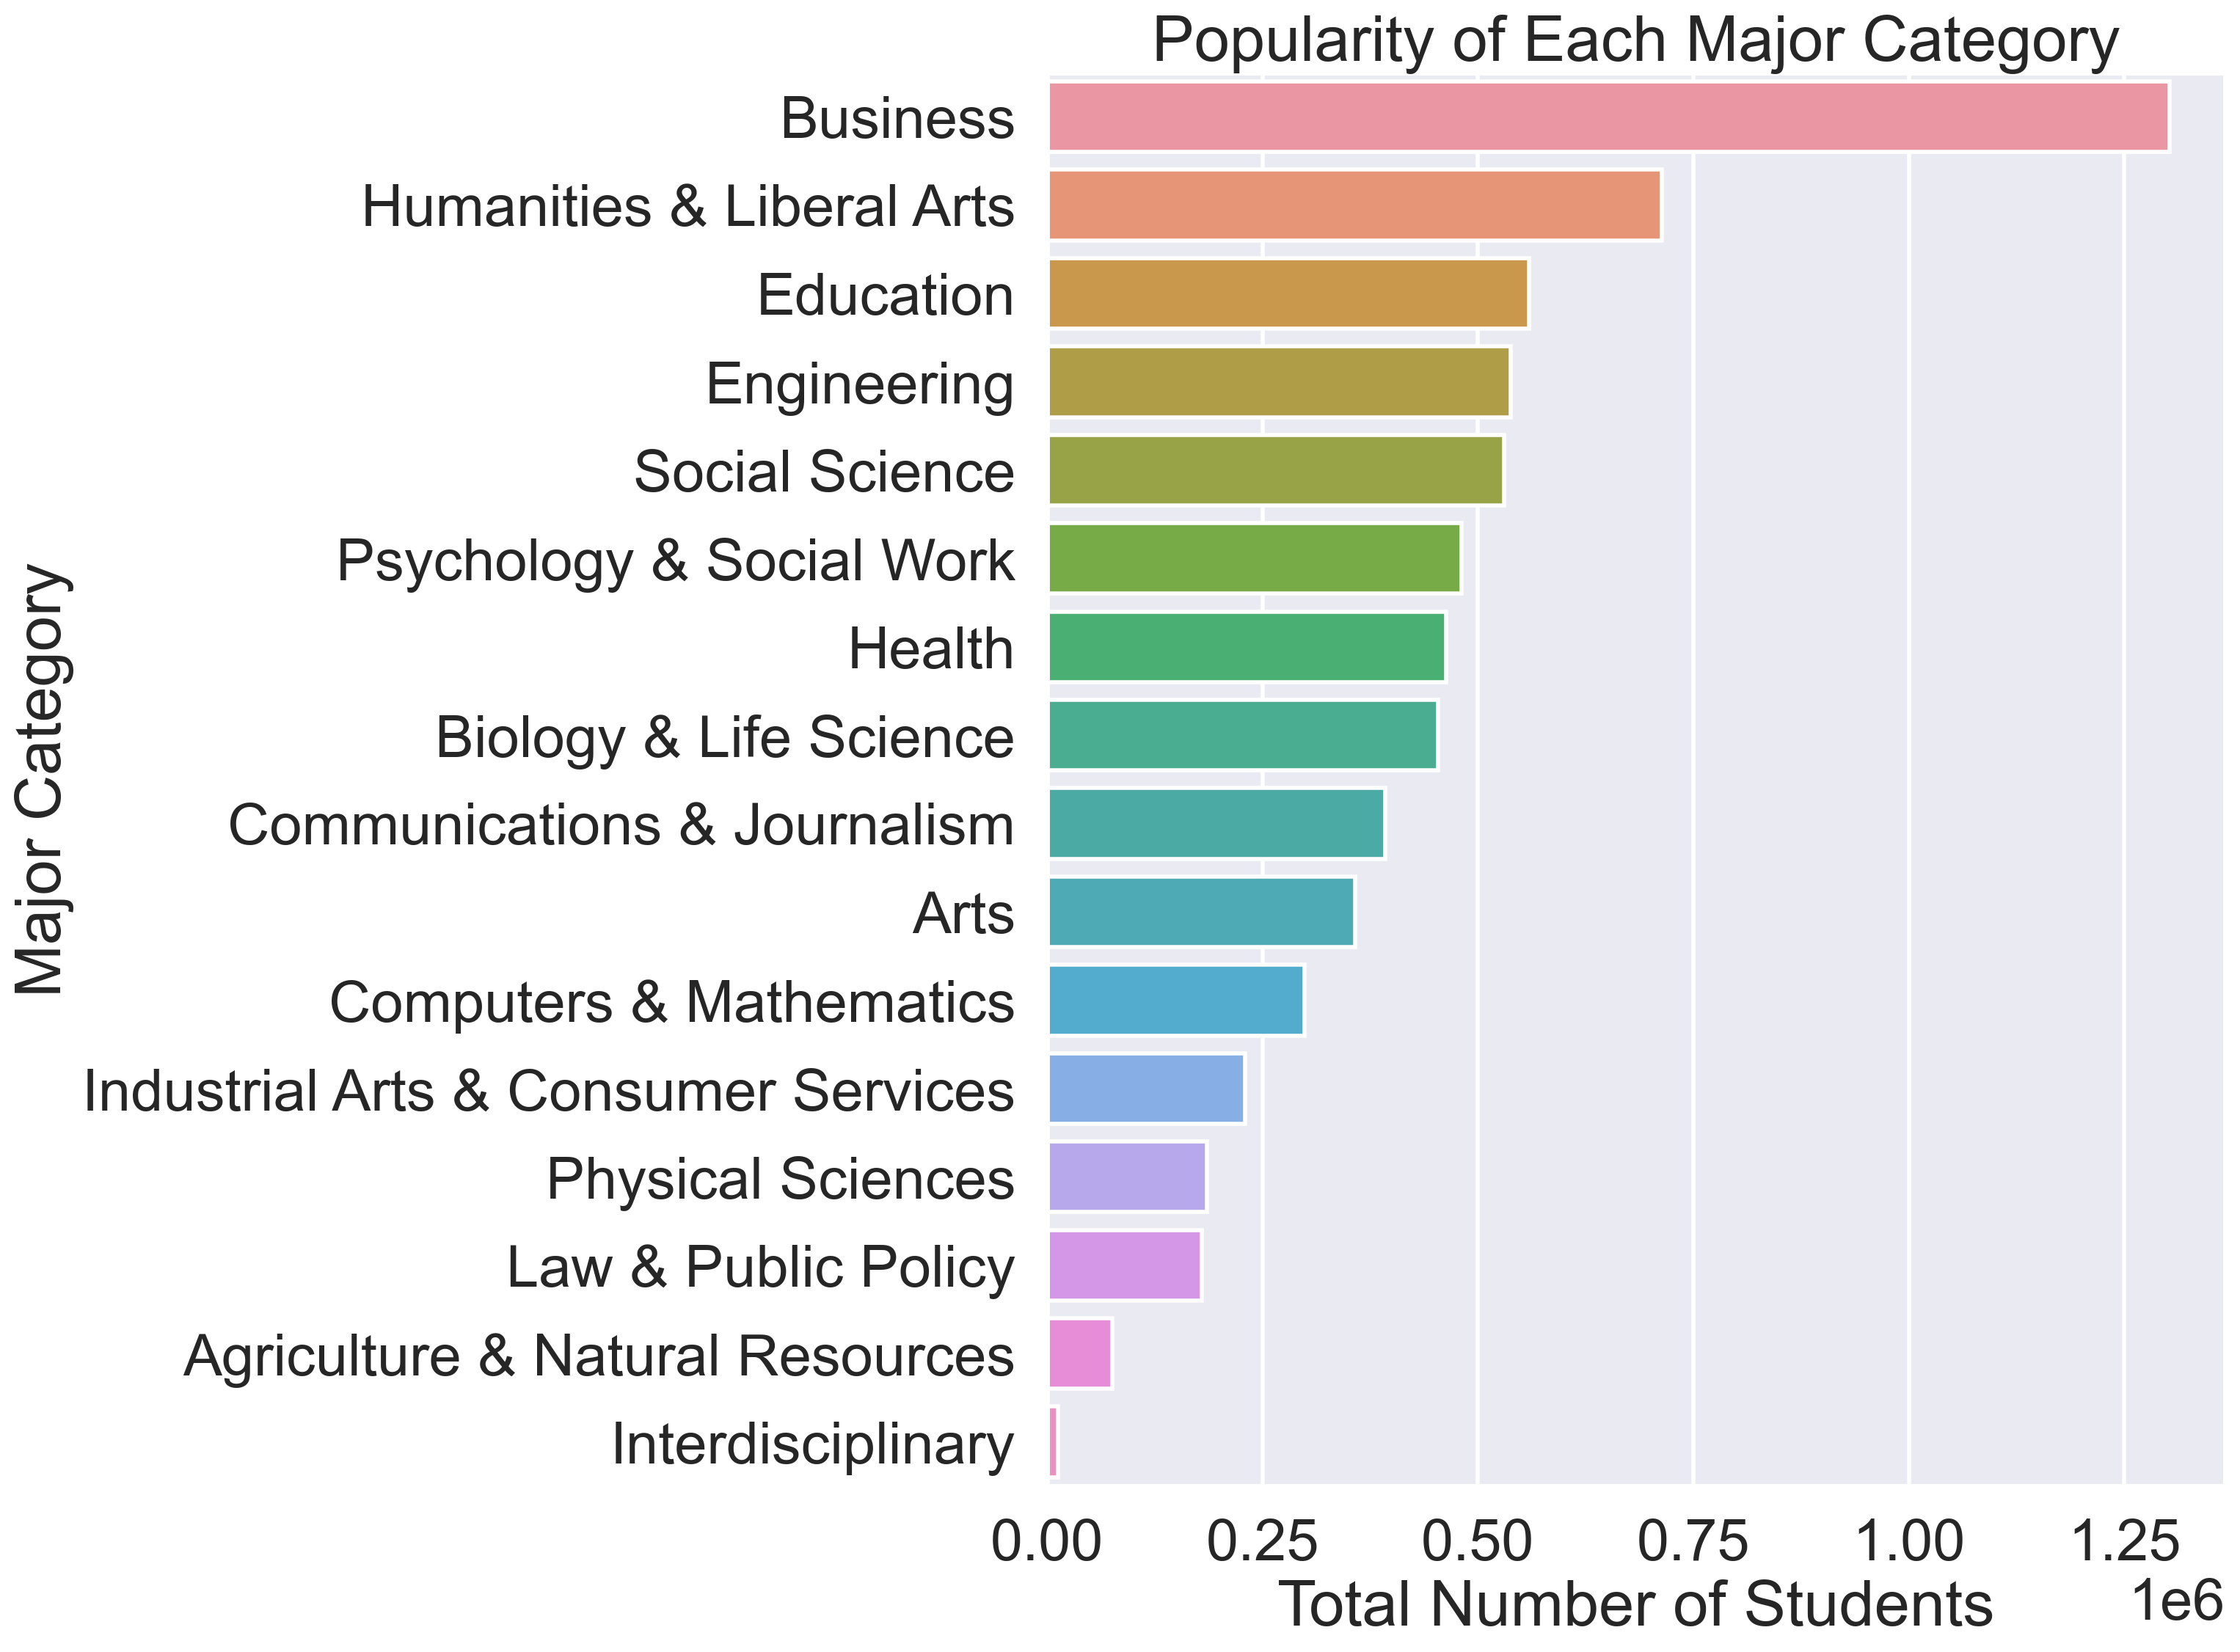

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
fig.patch.set_facecolor('w')

major_popularity = df.groupby('Major_category')['Total'].sum().reset_index()
major_popularity = major_popularity.sort_values(by='Total', ascending=False)

sns.barplot(x='Total', y='Major_category', data=major_popularity, ax=ax)
ax.set_title('Popularity of Each Major Category')
ax.set_xlabel('Total Number of Students')
ax.set_ylabel('Major Category')

fig.tight_layout()

### Top N Median salaries

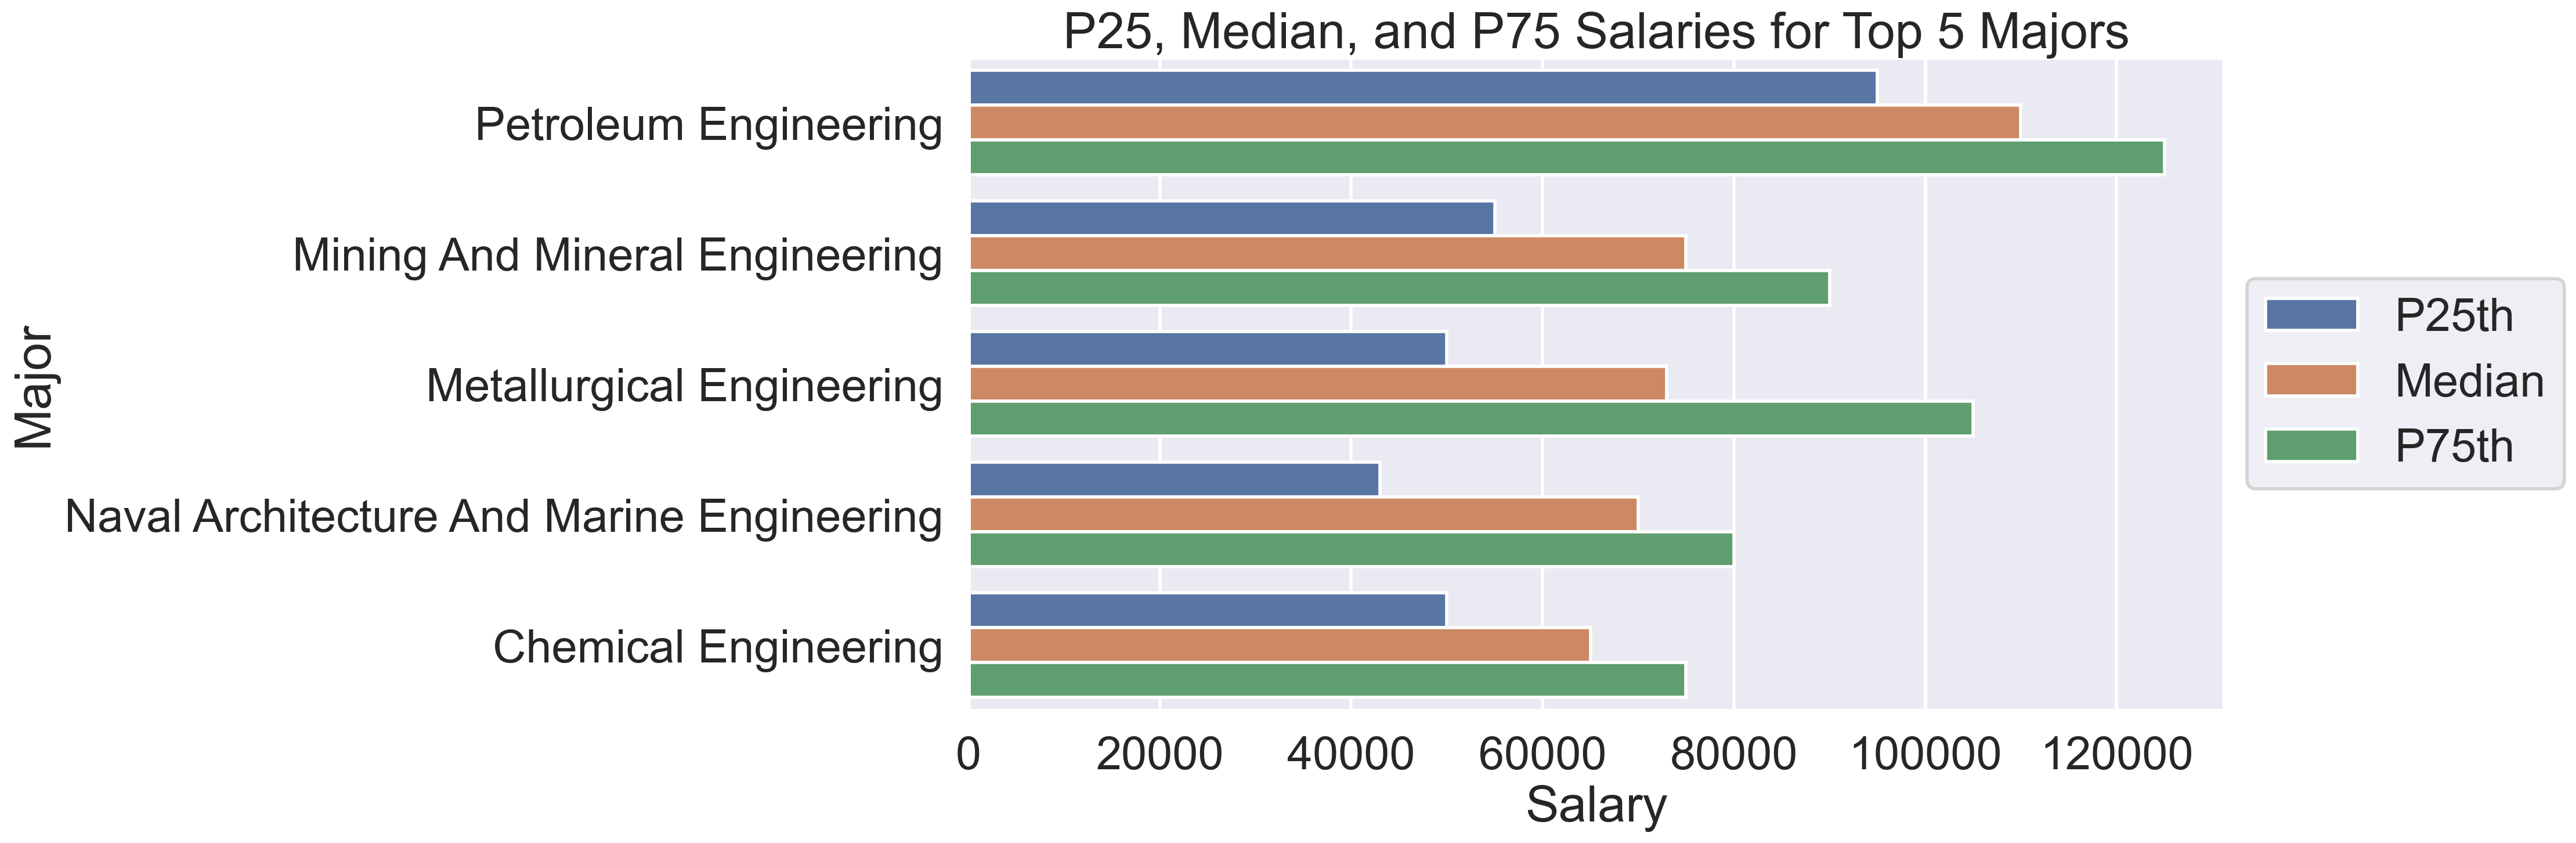

In [ ]:
plot_top_n_salaries(df, 5)

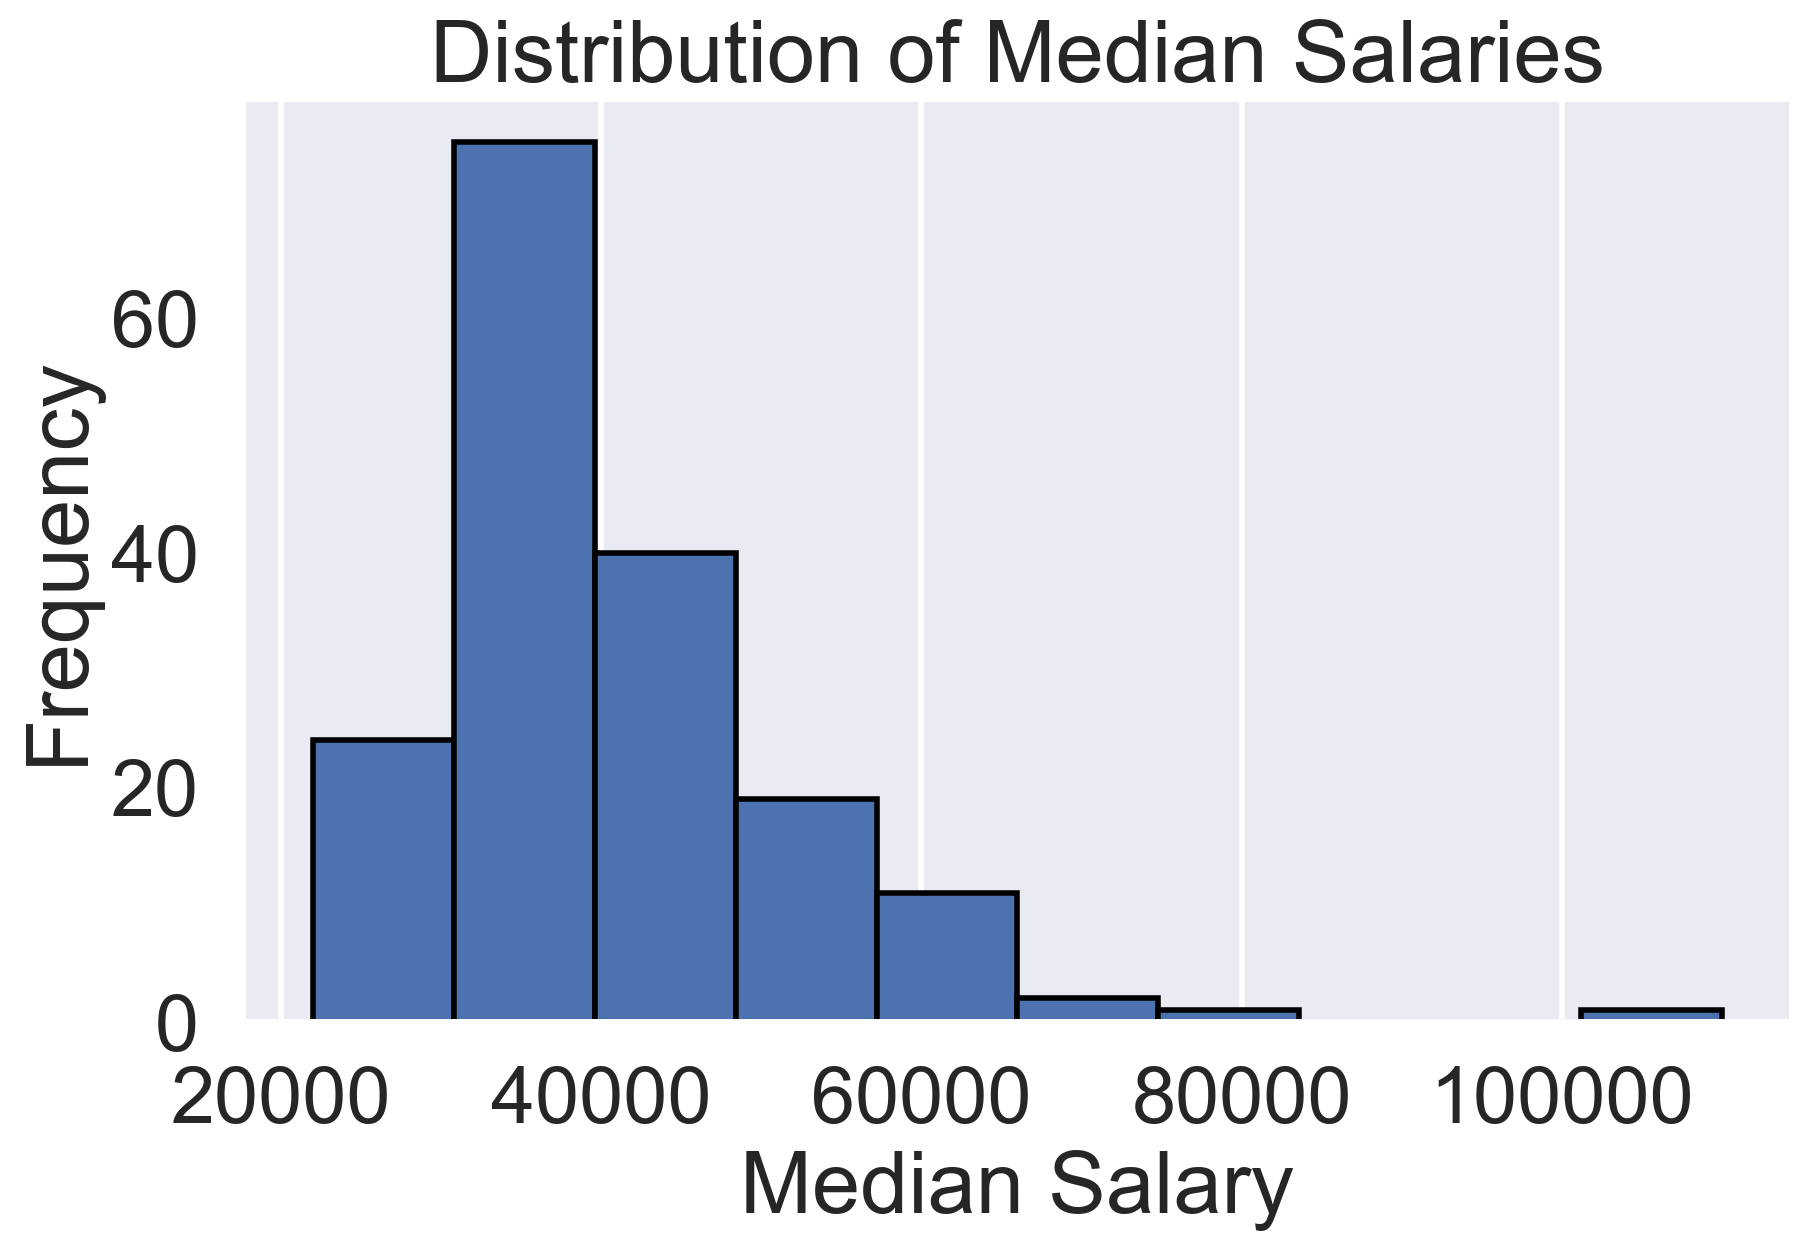

In [ ]:
plt.hist(df['Median'], bins=10, edgecolor='black')
plt.title('Distribution of Median Salaries')
plt.xlabel('Median Salary')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## Ydata Profile

In [ ]:
profile = ProfileReport(df, title='College Data', config_file="/Users/jonathan/Downloads/config_minimal.yaml")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

<class 'ydata_profiling.profile_report.ProfileReport'>.__repr__ returned empty string

## Cleanup

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()